In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')

In [237]:
data_clean = pd.read_csv('data_clean.csv')

#data_clean['Continent'] = data_clean['Region']
asia = ['South Asia', 'Middle East', 'Southeast Asia', 'East Asia', 'Central Asia']
europe = ['Balkans', 'Southern Europe', 'Eastern Europe', 'Western Europe', 'Northern Europe']
africa = ['North Africa', 'Southern Africa', 'West Africa', 'East Africa', 'Central Africa']
north_america = ['Caribbean', 'Central America', 'North America']
south_america = ['South America']
oceania = ['Oceania']

#for index in data_clean.index:
#    if data_clean.at[index,'Region'] in asia:
#        data_clean.at[index,'Continent'] = 'Asia'
#    elif data_clean.at[index,'Region'] in europe:
#        data_clean.at[index,'Continent'] = 'Europe'
#    elif data_clean.at[index,'Region'] in africa:
#        data_clean.at[index,'Continent'] = 'Africa'
#    elif data_clean.at[index,'Region'] in north_america:
#        data_clean.at[index,'Continent'] = 'North America'
#    elif data_clean.at[index,'Region'] in south_america:
#        data_clean.at[index,'Continent'] = 'South America'
#    else:
#        data_clean.at[index,'Continent'] = 'Oceania'

#del index
multi_index = pd.MultiIndex.from_frame(data_clean[['Continent','Country','Region']])
data_clean = data_clean.set_index(multi_index)

data_clean = data_clean.drop(columns = ['Continent', 'Region'])
print(data_clean.head())

                                      Country         Sex  Year  \
Continent Country     Region                                      
Asia      Afghanistan South Asia  Afghanistan  Both sexes  1975   
                      South Asia  Afghanistan        Male  1975   
                      South Asia  Afghanistan      Female  1975   
                      South Asia  Afghanistan  Both sexes  1976   
                      South Asia  Afghanistan        Male  1976   

                                    Obesity (%)  BMI  
Continent Country     Region                          
Asia      Afghanistan South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.6]  0.2  
                      South Asia  0.8 [0.2-2.0]  0.8  
                      South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.7]  0.2  


# Asia

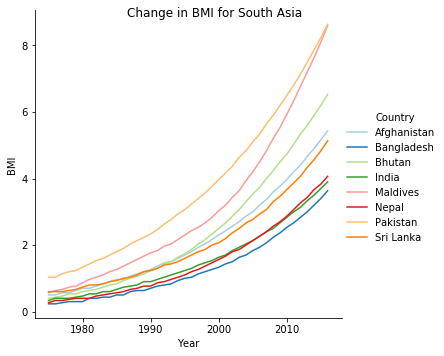

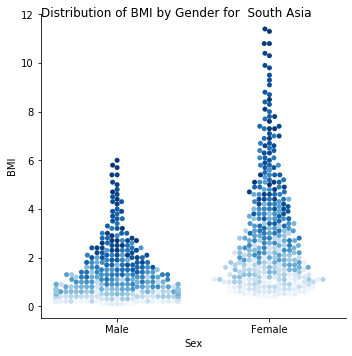

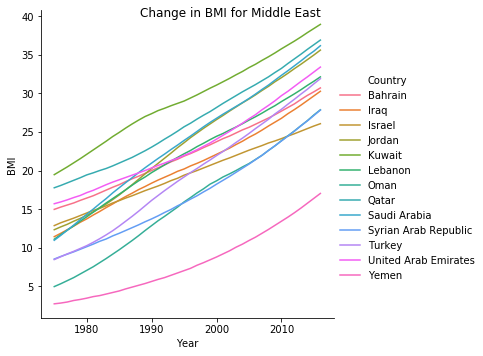

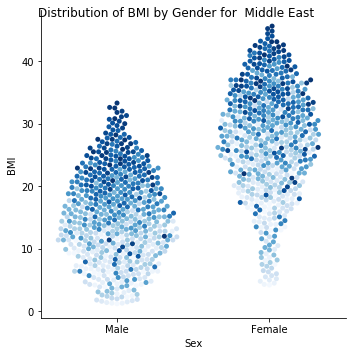

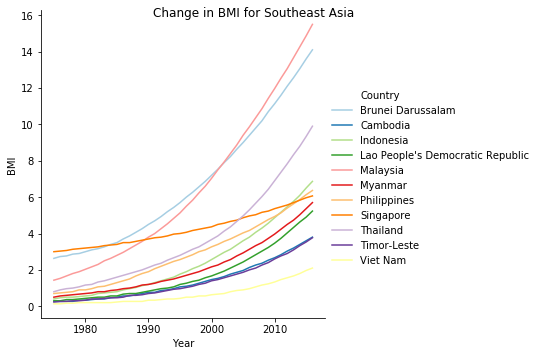

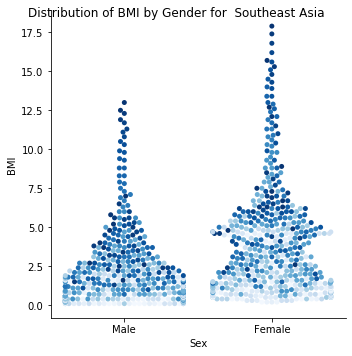

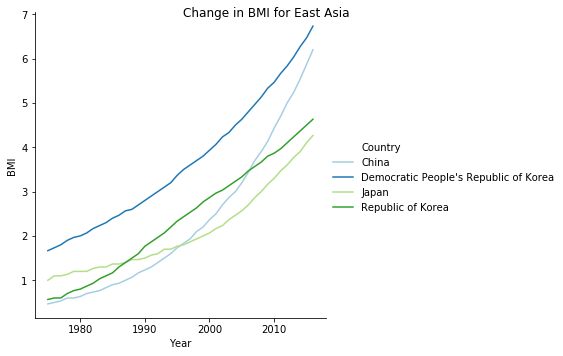

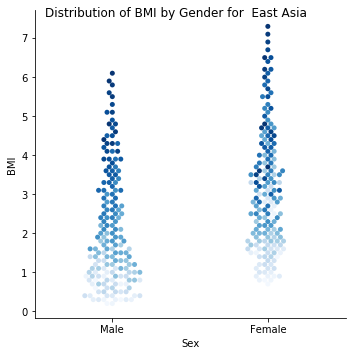

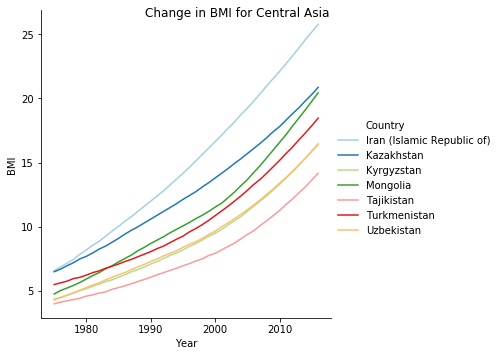

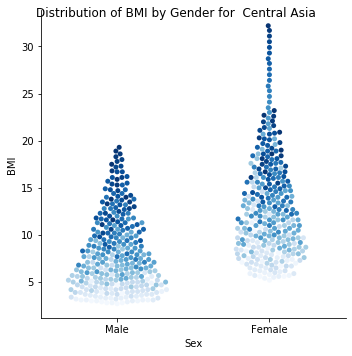

In [228]:
for region in asia:
    df_region = data_clean.xs(['Asia', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# Europe

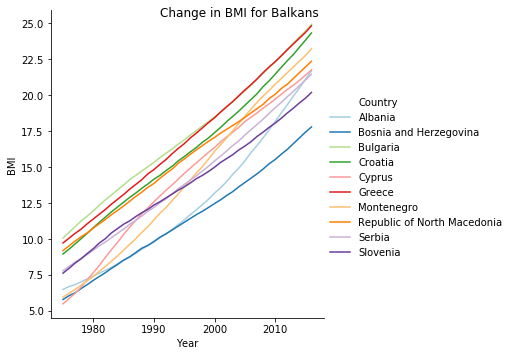

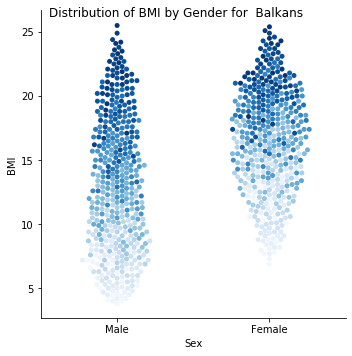

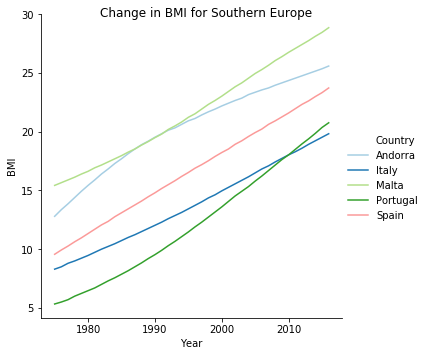

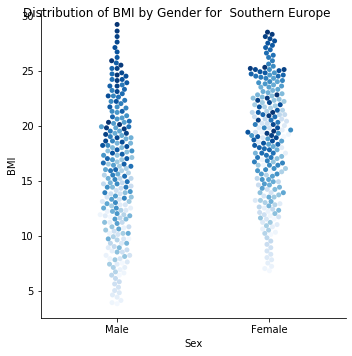

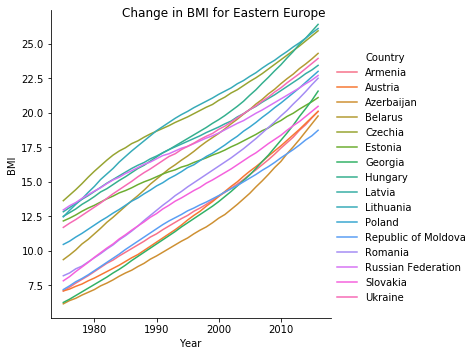

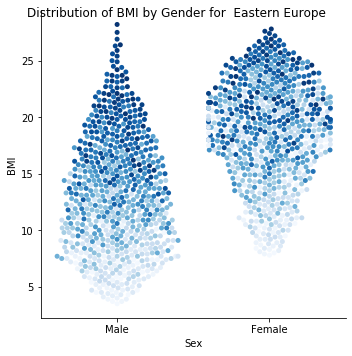

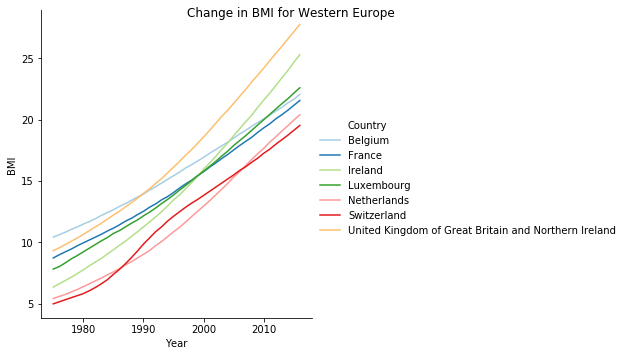

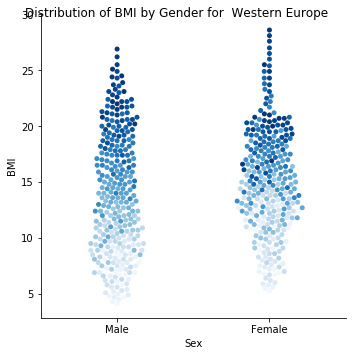

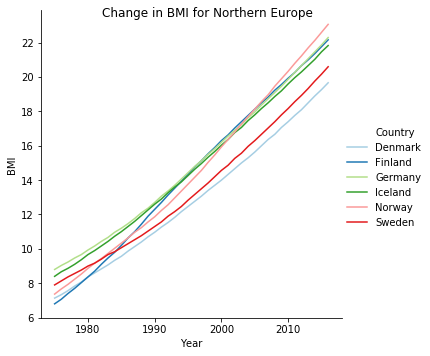

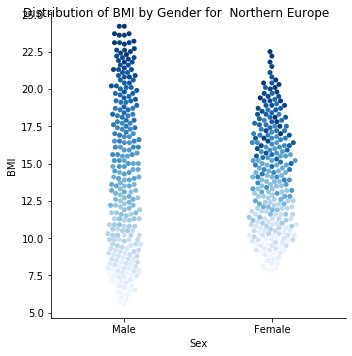

In [229]:
data_clean = data_clean.mask(data_clean['Country'] == 'Monaco').mask(data_clean['Country'] == 'San Marino').dropna()
for region in europe:
    df_region = data_clean.xs(['Europe', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# Africa

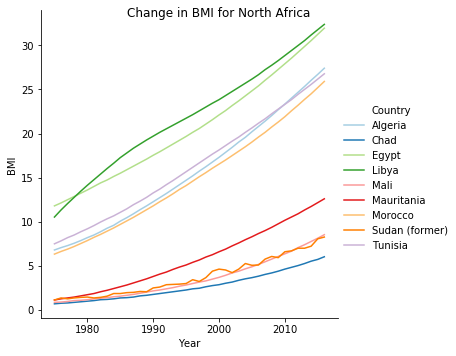

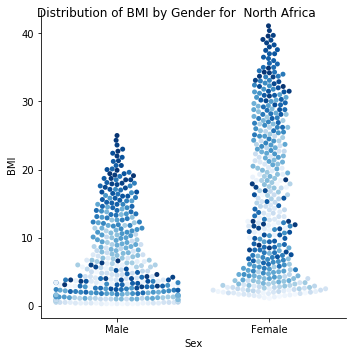

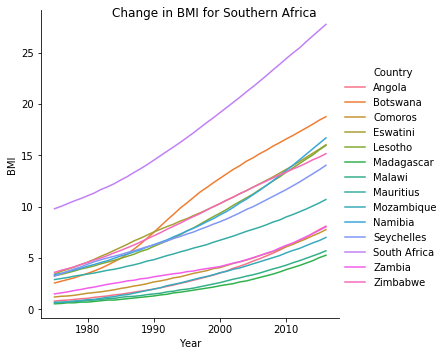

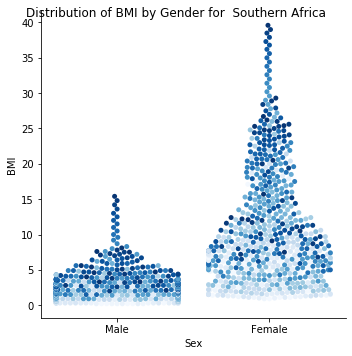

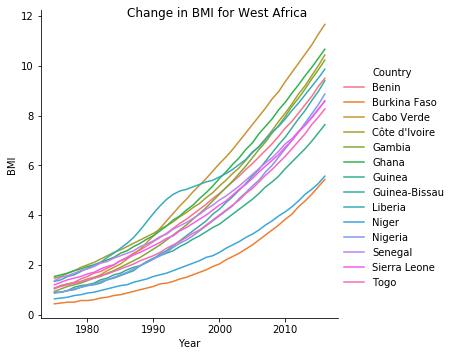

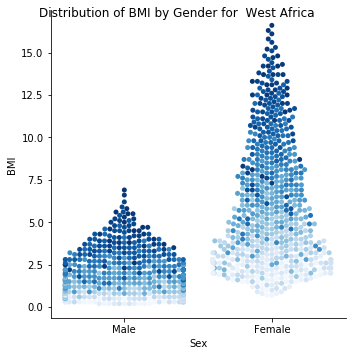

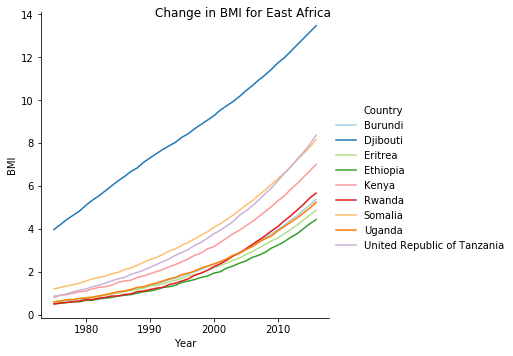

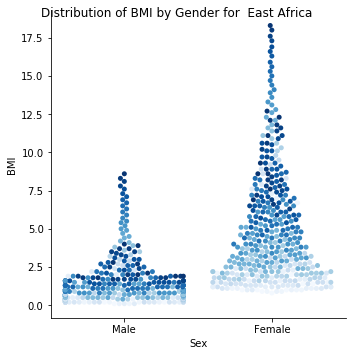

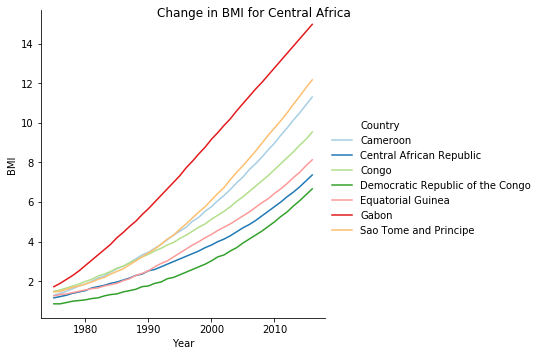

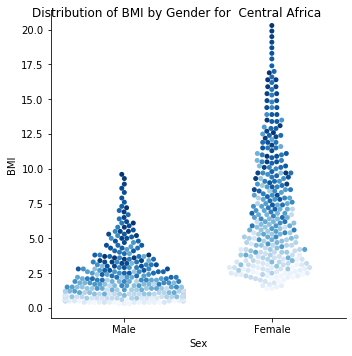

In [230]:
data_clean = data_clean.mask(data_clean['Country'] == 'Sudan').mask(data_clean['Country'] == 'South Sudan').dropna()
for region in africa:
    df_region = data_clean.xs(['Africa', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# North America

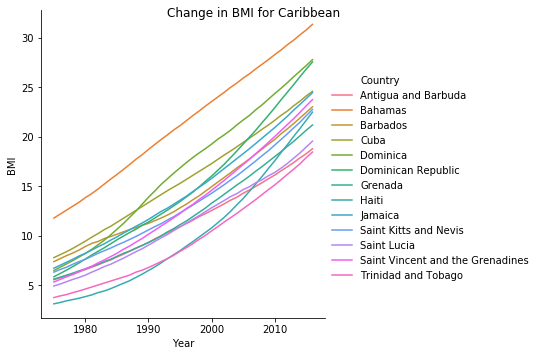

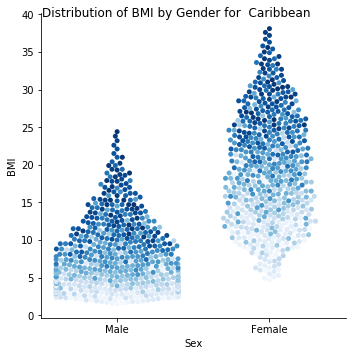

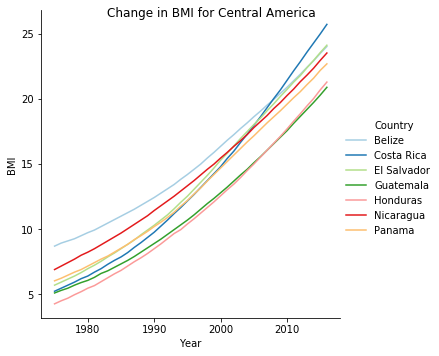

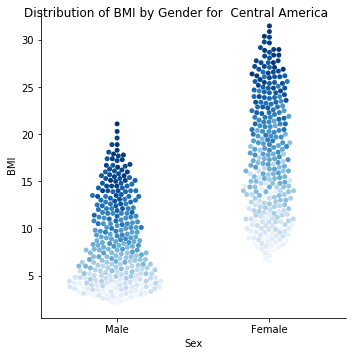

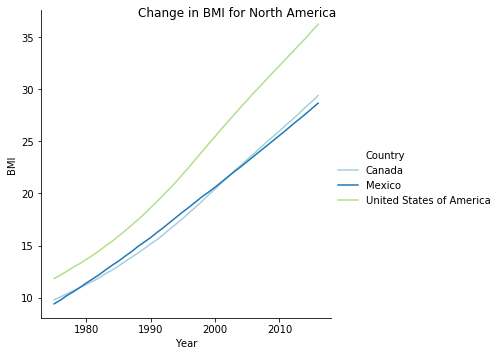

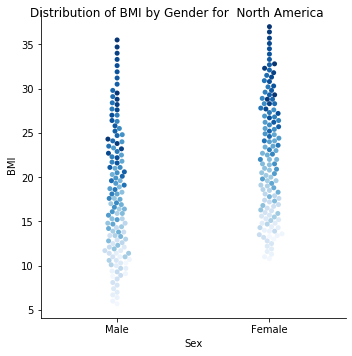

In [231]:
for region in north_america:
    df_region = data_clean.xs(['North America', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# South America

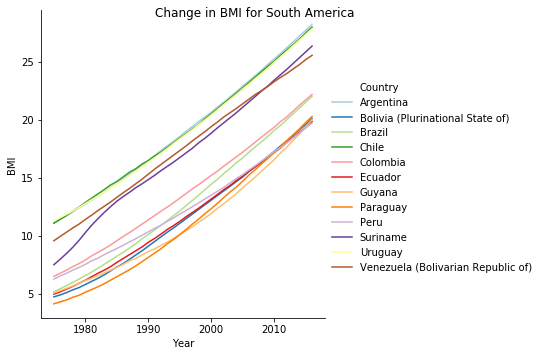

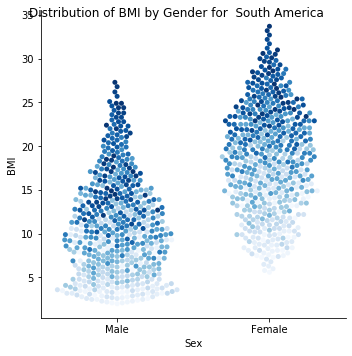

In [236]:
for region in south_america:
    df_region = data_clean.xs(['South America', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# Oceania

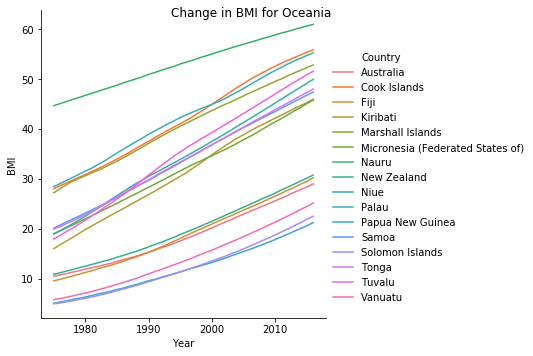

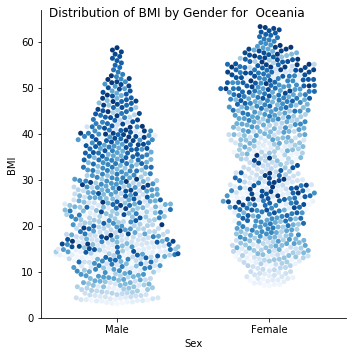

In [238]:
for region in oceania:
    df_region = data_clean.xs(['Oceania', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))